In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim
import numpy as np

In [17]:
df = pd.read_csv('place_info_final.csv')
df

,name,address,rating,latitude,longitude,close,open,district,store_chain
0,Violet Pham,"197 Đ. Xuân Thủy, Dịch Vọng Hậu, Cầu Giấy, Hà Nội",4.3,21.036423,105.784302,8 AM,8 AM,Cầu Giấy,Other
1,OVmart - Lê Trọng Tấn,"220 P. Lê Trọng Tấn, Định Công, Thanh Xuân, Hà...",4.4,20.991840,105.832637,10 PM,8 AM,Thanh Xuân,Other
2,Mẹ và Bé,"121 P. Chùa Quỳnh, Bạch Mai, Hai Bà Trưng, Hà Nội",5.0,20.999551,105.853609,24 hours,24 hours,Hai Bà Trưng,Mẹ và Bé
3,Baby Kid,"214 P. Nguyễn Ngọc Nại, Khương Mai, Thanh Xuân...",3.0,20.996934,105.826858,9:30 PM,8 AM,Thanh Xuân,Other
4,Nana's House - Siêu thị Mẹ và Bé,"117K1 P. Giảng Võ, Chợ Dừa, Đống Đa, Hà Nội , ...",3.9,21.026878,105.824006,9:30 PM,8 AM,Đống Đa,Mẹ và Bé
...,...,...,...,...,...,...,...,...,...
139,KidsPlaza Store Support Office,"C, TT9-6, Khu nhà ở Him Lam, Hà Đông, Hà Nội",4.0,20.979877,105.767599,8 AM,8 AM,Hà Đông,KidsPlaza
140,KidsPlaza - Combo đồ sơ sinh mùa hè bé trai bé...,"Tòa Nhà HH2 Bắc Hà, P. Tố Hữu, Trung Văn, Nam ...",4.9,20.997874,105.795412,10 PM,8 AM,Nam Từ Liêm,KidsPlaza
141,KidsPlaza Kiot 4 - 6 tầng 1 HH03A Khu ĐT Thanh...,"Kiot 4 - 6 tầng 1 HH03A Khu ĐT Thanh, Hà Đông,...",5.0,20.955835,105.756366,10 PM,8 AM,Hà Đông,KidsPlaza
142,KidsPlaza,"100-A12, Tôn Thất Tùng, Quận Đống Đa, Thành Ph...",5.0,21.005910,105.831146,9:30 PM,8 AM,Đống Đa,KidsPlaza


In [32]:
df.drop_duplicates(inplace=True)

In [20]:
df.drop(['openurl','status'],axis=1,inplace=True)


In [34]:
df

,name,address,rating,latitude,longitude,close,open,district
0,Violet Pham,"197 Đ. Xuân Thủy, Dịch Vọng Hậu, Cầu Giấy, Hà Nội",4.3,21.036423,105.784302,8 AM,8 AM,Cầu Giấy
1,OVmart - Lê Trọng Tấn,"220 P. Lê Trọng Tấn, Định Công, Thanh Xuân, Hà...",4.4,20.991840,105.832637,10 PM,8 AM,Thanh Xuân
2,Mẹ và Bé,"121 P. Chùa Quỳnh, Bạch Mai, Hai Bà Trưng, Hà Nội",5.0,20.999551,105.853609,24 hours,24 hours,Hai Bà Trưng
3,Baby Kid,"214 P. Nguyễn Ngọc Nại, Khương Mai, Thanh Xuân...",3.0,20.996934,105.826858,9:30 PM,8 AM,Thanh Xuân
4,Nana's House - Siêu thị Mẹ và Bé,"117K1 P. Giảng Võ, Chợ Dừa, Đống Đa, Hà Nội , ...",3.9,21.026878,105.824006,9:30 PM,8 AM,Đống Đa
...,...,...,...,...,...,...,...,...
164,KidsPlaza Store Support Office,"C, TT9-6, Khu nhà ở Him Lam, Hà Đông, Hà Nội",4.0,20.979877,105.767599,8 AM,8 AM,Hà Đông
166,KidsPlaza - Combo đồ sơ sinh mùa hè bé trai bé...,"Tòa Nhà HH2 Bắc Hà, P. Tố Hữu, Trung Văn, Nam ...",4.9,20.997874,105.795412,10 PM,8 AM,Nam Từ Liêm
167,KidsPlaza Kiot 4 - 6 tầng 1 HH03A Khu ĐT Thanh...,"Kiot 4 - 6 tầng 1 HH03A Khu ĐT Thanh, Hà Đông,...",5.0,20.955835,105.756366,10 PM,8 AM,Hà Đông
168,KidsPlaza,"100-A12, Tôn Thất Tùng, Quận Đống Đa, Thành Ph...",5.0,21.005910,105.831146,9:30 PM,8 AM,Đống Đa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       172 non-null    object 
 1   address    172 non-null    object 
 2   rating     172 non-null    float64
 3   latitude   172 non-null    float64
 4   longitude  172 non-null    float64
 5   close      172 non-null    object 
 6   open       172 non-null    object 
dtypes: float64(3), object(4)
memory usage: 9.5+ KB


In [7]:
df.describe()

,rating,latitude,longitude
count,172.000000,172.000000,172.000000
mean,3.745930,21.013451,105.813100
std,1.026682,0.029932,0.041645
min,1.000000,20.936045,105.610710
25%,3.500000,20.994985,105.788520
50%,4.000000,21.012187,105.809753
75%,4.300000,21.034775,105.831893
max,5.000000,21.088096,105.950561


# Phân tích chung

C:\Users\HP\AppData\Local\Temp\ipykernel_26180\4072853722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_counts.index, x=district_counts.values, palette='viridis')


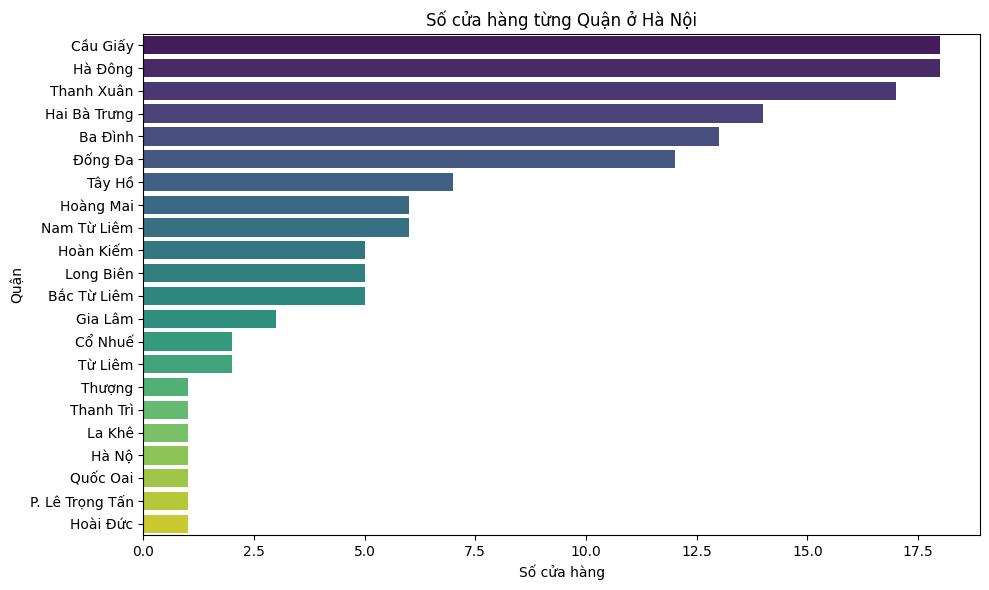

In [61]:
df['district'] = df['address'].str.extract(r', ([^,]+), Hà Nội')

district_counts = df['district'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=district_counts.index, x=district_counts.values, palette='viridis')

plt.xlabel('Số cửa hàng')
plt.ylabel('Quận')
plt.title('Số cửa hàng từng Quận ở Hà Nội')
plt.tight_layout()

plt.show()

In [63]:
df1 = df.copy()

In [74]:
open_hours_distribution = df['open'].value_counts()
close_hours_distribution = df['close'].value_counts()

# Hiển thị kết quả
print("Phân bố giờ mở cửa:")
print(open_hours_distribution)

print("\nPhân bố giờ đóng cửa:")
print(close_hours_distribution)

Phân bố giờ mở cửa:
open
8 AM        83
7 AM        35
24 hours     9
7:30 AM      8
8:30 AM      3
9 AM         3
10:30 AM     1
6:30 AM      1
7:45 AM      1
Name: count, dtype: int64

Phân bố giờ đóng cửa:
close
10 PM       104
9:30 PM      21
24 hours      9
8 AM          4
7 AM          2
8:30 AM       2
10:30 PM      1
10:15 PM      1
Name: count, dtype: int64


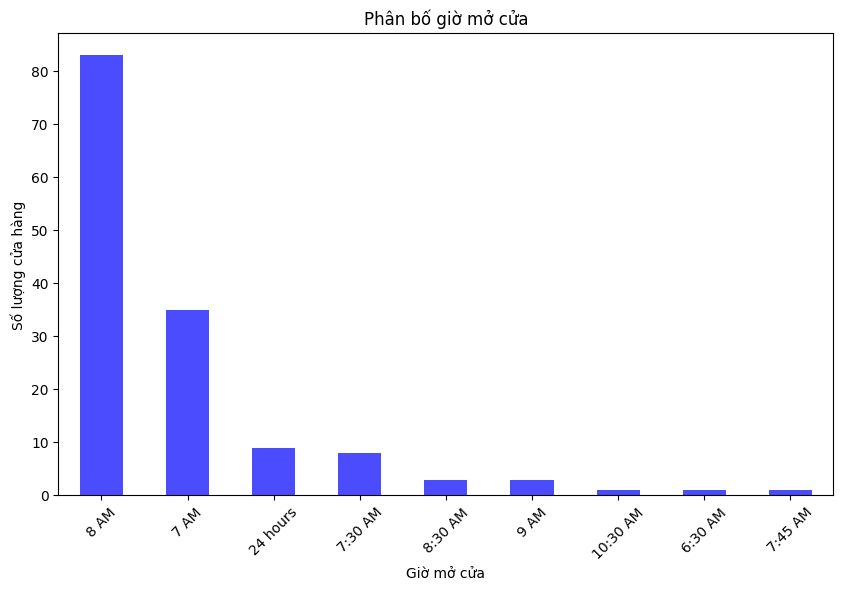

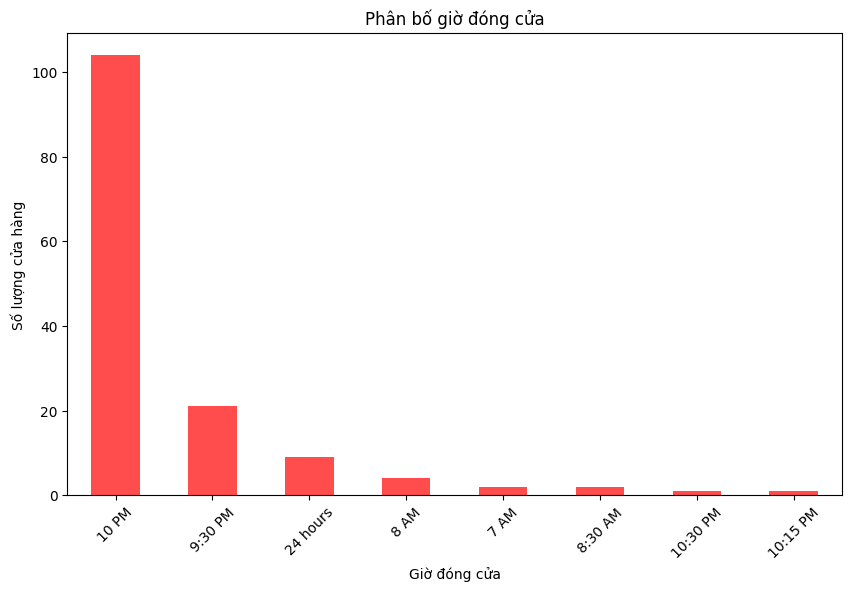

In [65]:
plt.figure(figsize=(10, 6))
open_hours_distribution.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Phân bố giờ mở cửa')
plt.xlabel('Giờ mở cửa')
plt.ylabel('Số lượng cửa hàng')
plt.xticks(rotation=45)
plt.show()

# Vẽ biểu đồ phân bố giờ đóng cửa
plt.figure(figsize=(10, 6))
close_hours_distribution.plot(kind='bar', color='red', alpha=0.7)
plt.title('Phân bố giờ đóng cửa')
plt.xlabel('Giờ đóng cửa')
plt.ylabel('Số lượng cửa hàng')
plt.xticks(rotation=45)
plt.show()

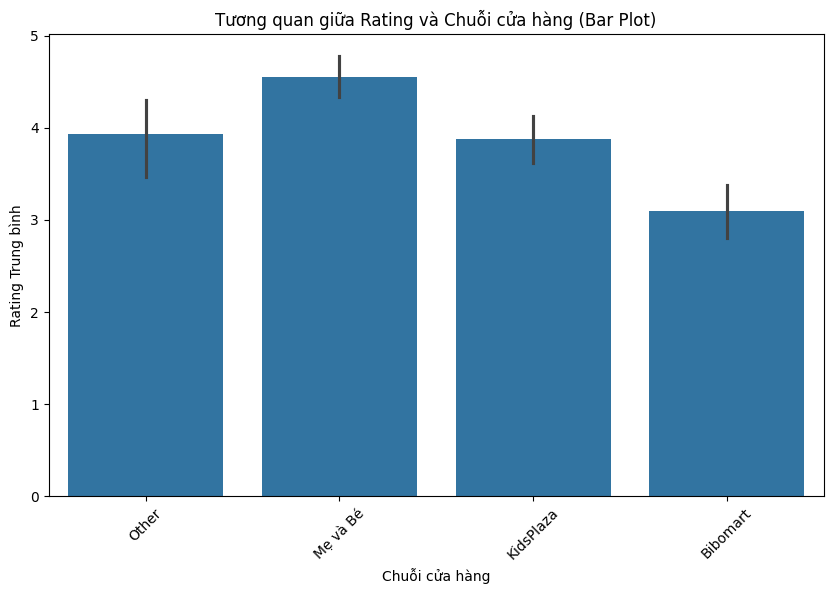

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='store_chain', y='rating', data=df, estimator=np.mean)
plt.title('Tương quan giữa Rating và Chuỗi cửa hàng (Bar Plot)')
plt.xlabel('Chuỗi cửa hàng')
plt.ylabel('Rating Trung bình')
plt.xticks(rotation=45)
plt.show()

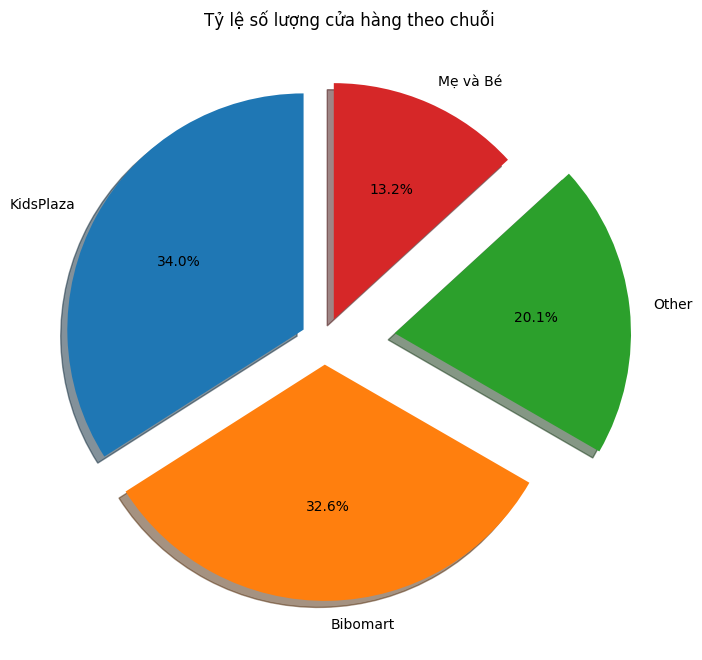

In [33]:
store_chain_counts = df['store_chain'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(store_chain_counts, labels=store_chain_counts.index, 
        autopct='%1.1f%%', startangle=90, explode=(0.1,0.1,0.3,0.1),
        shadow=True)
plt.title('Tỷ lệ số lượng cửa hàng theo chuỗi')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()